In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/Rinew/Downloads/Documents/codes/GHI data for three years-(2017-2019).csv')
data.head()

,TmStamp,GHI,Temperature,Relative_Humidity,Rain_Tot,Wind_Speed,Wind_Vector_Magn_Avg,Wind_Direction,Wind_Direction_StdDev,Wind_Speed_Max,Barometric_Pressure,LoggerTemperature_Avg,Azimuth_angle,Tilt_angle,Year,Month,Week,Day,Hour
0,1/1/2017 1:00,0.000000,22.713000,94.038333,0.0,1.929600,1.894350,124.915000,10.792600,2.613333,944.916667,22.472500,154.075000,129.121667,2017,1,52,1,1
1,1/1/2017 2:00,0.000000,22.396167,95.458333,0.0,1.223300,1.203350,108.228333,10.060583,1.672533,944.400000,22.515833,139.875000,121.590000,2017,1,52,1,2
2,1/1/2017 3:00,0.000000,22.299667,95.508333,0.0,0.962467,0.952733,121.105000,7.570700,1.291967,944.000000,22.519500,129.038333,111.728333,2017,1,52,1,3
3,1/1/2017 4:00,0.000000,22.340833,95.406667,0.0,1.324133,1.296300,113.325000,11.499333,1.857100,944.000000,22.639167,120.798333,100.383333,2017,1,52,1,4
4,1/1/2017 5:00,8.206039,22.099333,95.903333,0.0,1.546350,1.516867,103.098333,10.988067,2.089033,944.433333,22.502500,114.356667,88.008333,2017,1,52,1,5


In [3]:
data = data.rename(columns={'Wind_Vector_Magn_Avg': 'Wind_Vector_Magnitude'})

In [4]:
data.head()

,TmStamp,GHI,Temperature,Relative_Humidity,Rain_Tot,Wind_Speed,Wind_Vector_Magnitude,Wind_Direction,Wind_Direction_StdDev,Wind_Speed_Max,Barometric_Pressure,LoggerTemperature_Avg,Azimuth_angle,Tilt_angle,Year,Month,Week,Day,Hour
0,1/1/2017 1:00,0.000000,22.713000,94.038333,0.0,1.929600,1.894350,124.915000,10.792600,2.613333,944.916667,22.472500,154.075000,129.121667,2017,1,52,1,1
1,1/1/2017 2:00,0.000000,22.396167,95.458333,0.0,1.223300,1.203350,108.228333,10.060583,1.672533,944.400000,22.515833,139.875000,121.590000,2017,1,52,1,2
2,1/1/2017 3:00,0.000000,22.299667,95.508333,0.0,0.962467,0.952733,121.105000,7.570700,1.291967,944.000000,22.519500,129.038333,111.728333,2017,1,52,1,3
3,1/1/2017 4:00,0.000000,22.340833,95.406667,0.0,1.324133,1.296300,113.325000,11.499333,1.857100,944.000000,22.639167,120.798333,100.383333,2017,1,52,1,4
4,1/1/2017 5:00,8.206039,22.099333,95.903333,0.0,1.546350,1.516867,103.098333,10.988067,2.089033,944.433333,22.502500,114.356667,88.008333,2017,1,52,1,5


Text(0, 0.5, 'Tilt angle (degree)')

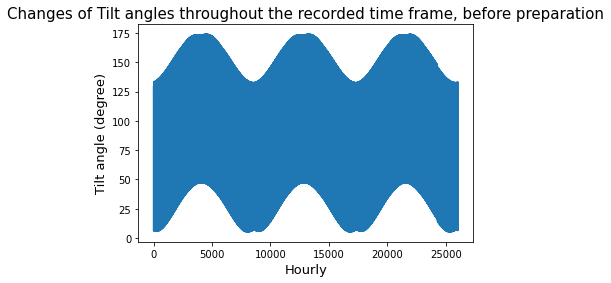

In [5]:
# Visualization of target variable before preparation

plt.title('Changes of Tilt angles throughout the recorded time frame, before preparation',fontsize=15)
plt.plot(data.Tilt_angle)
plt.xlabel('Hourly',fontsize=13)
plt.ylabel('Tilt angle (degree)',fontsize=13)

In [6]:
# Removing hours where there is no solar irradience 

data = data[data.Hour != 1]
data = data[data.Hour != 2]
data = data[data.Hour != 3]
data = data[data.Hour != 4]
data = data[data.Hour != 19]
data = data[data.Hour != 20]
data = data[data.Hour != 21]
data = data[data.Hour != 22]
data = data[data.Hour != 23]
data = data[data.Hour != 0]

In [7]:
# Excluding the rows with a tilt angle larger than 92 degrees, since they were recorded during the
#time like winter where hours like 5 am its still dark.

data = data[data['Tilt_angle'] <= 92]

# Droppong all rows with null values
data = data.dropna()

In [8]:
Time = data['TmStamp']
GHI = data['GHI']

# dropping all dependent variables from the data so that we only left with the target variable, tilt angle
data = data.drop(['Azimuth_angle','TmStamp','GHI'],axis = 1)

Text(0, 0.5, 'Tilt angle (degree)')

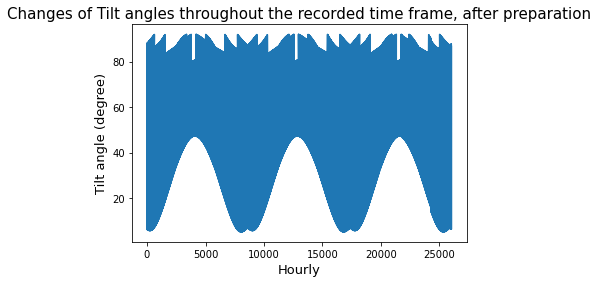

In [9]:
# Visualization of target variable after preparation

plt.title('Changes of Tilt angles throughout the recorded time frame, after preparation',fontsize=15)
plt.plot(data.Tilt_angle)
plt.xlabel('Hourly',fontsize=13)
plt.ylabel('Tilt angle (degree)',fontsize=13)

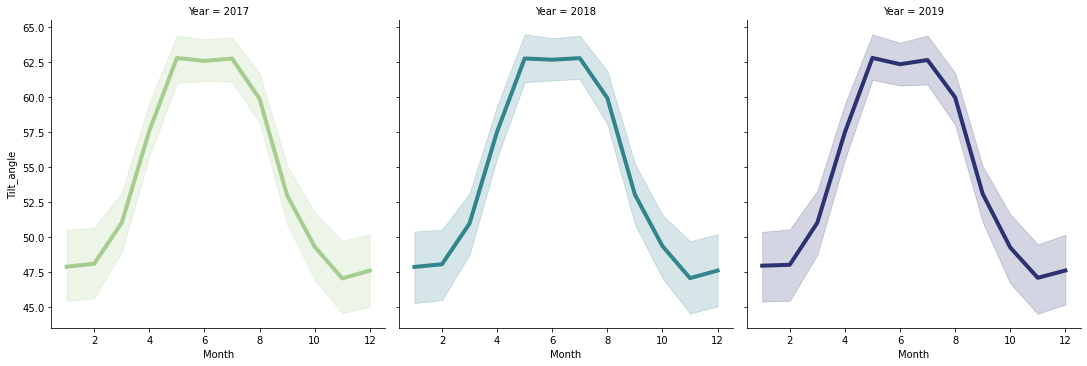

In [10]:
# Plot each year's time series in its own facet
g = sns.relplot(
    data=data,
    x="Month", y="Tilt_angle", col="Year", hue="Year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, legend=False)

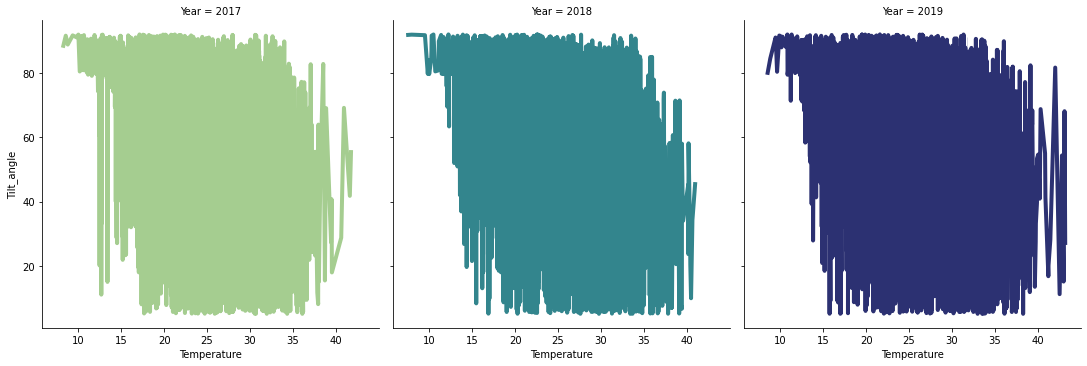

In [11]:
# Plot each year's time series in its own facet
g = sns.relplot(
    data=data,
    x="Temperature", y="Tilt_angle", col="Year", hue="Year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, legend=False)

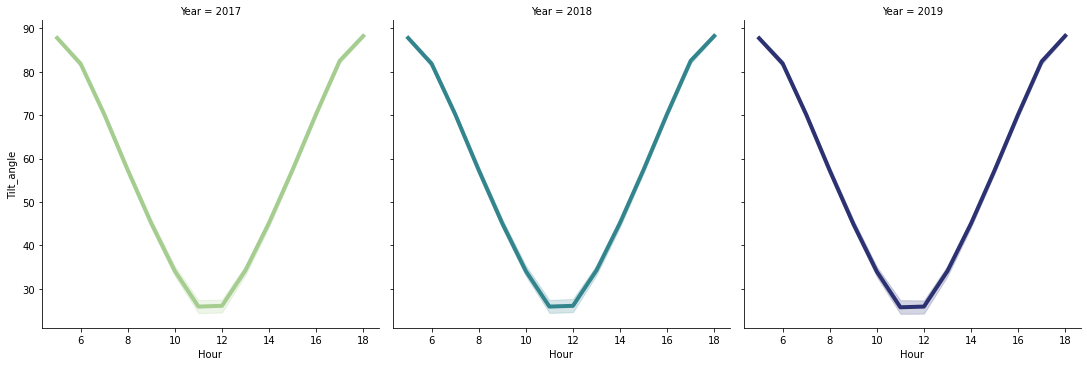

In [12]:
# Plot each year's time series in its own facet
g = sns.relplot(
    data=data,
    x="Hour", y="Tilt_angle", col="Year", hue="Year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, legend=False)

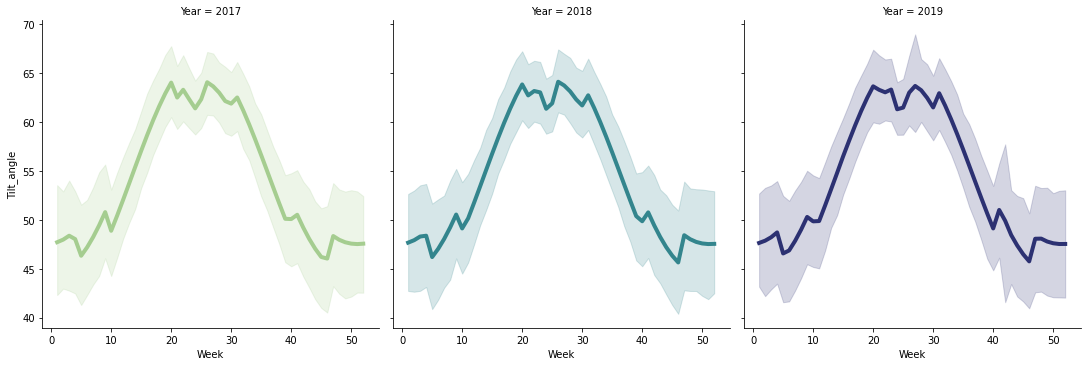

In [13]:
# Plot each year's time series in its own facet
g = sns.relplot(
    data=data,
    x="Week", y="Tilt_angle", col="Year", hue="Year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, legend=False)

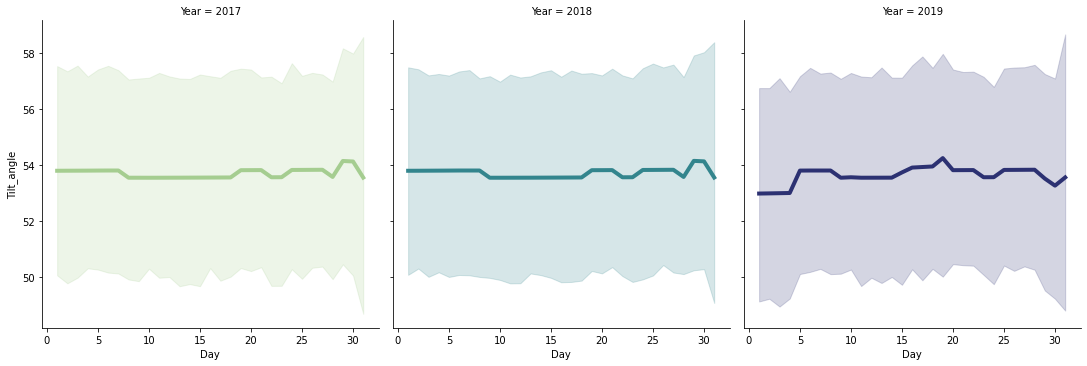

In [14]:
# Plot each year's time series in its own facet
g = sns.relplot(
    data=data,
    x="Day", y="Tilt_angle", col="Year", hue="Year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, legend=False)

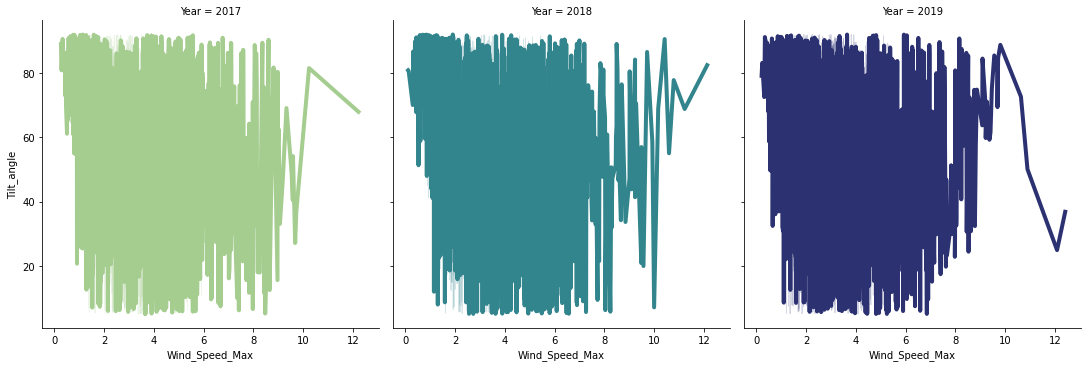

In [15]:
# Plot each year's time series in its own facet
g = sns.relplot(
    data=data,
    x="Wind_Speed_Max", y="Tilt_angle", col="Year", hue="Year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, legend=False)

C:\Users\Rinew\anaconda3\envs\Tensorflow_CPU\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rinew\anaconda3\envs\Tensorflow_CPU\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Tilt angles (degree)')

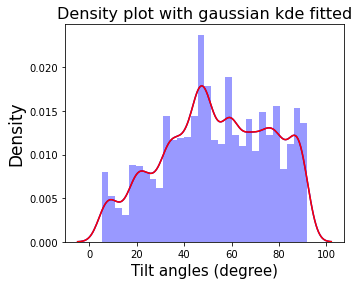

In [16]:
# Density plot for target variable

plt.figure(figsize=(5,4))
plt.ylabel('Density',fontsize=17)
sns.distplot(data.Tilt_angle, hist=True, color = 'b')
sns.distplot(data.Tilt_angle, hist=False, color = 'r')
plt.title('Density plot with gaussian kde fitted',fontsize=16)
plt.xlabel('Tilt angles (degree)',fontsize=15)

In [17]:
# describing the summary statistics of data
data.describe()

,Temperature,Relative_Humidity,Rain_Tot,Wind_Speed,Wind_Vector_Magnitude,Wind_Direction,Wind_Direction_StdDev,Wind_Speed_Max,Barometric_Pressure,LoggerTemperature_Avg,Tilt_angle,Year,Month,Week,Day,Hour
count,13437.000000,13437.000000,13437.000000,13437.000000,13437.000000,13437.000000,13437.000000,13437.000000,13437.000000,13437.000000,13437.000000,13437.000000,13437.000000,13437.000000,13437.000000,13437.000000
mean,24.837724,57.181832,0.000839,2.226403,2.151318,161.489322,14.351143,3.242690,946.955037,27.801923,53.691917,2017.991442,6.548932,26.569770,15.738855,11.508968
std,5.755480,22.445224,0.009398,1.024291,0.993424,65.611325,3.409709,1.518386,5.470370,7.641150,22.607369,0.814703,3.574236,15.604739,8.795393,3.615468
min,7.522267,5.597633,0.000000,0.062817,0.062767,17.943283,0.139400,0.119233,922.500000,5.330583,5.137350,2017.000000,1.000000,1.000000,1.000000,5.000000
25%,20.720833,40.033833,0.000000,1.461517,1.404400,118.341033,12.675433,2.138033,943.016667,22.045333,37.328000,2017.000000,3.000000,13.000000,8.000000,8.000000
50%,24.616167,56.495000,0.000000,2.070000,2.000167,148.356667,14.527800,2.992267,946.833333,28.023833,53.348500,2018.000000,7.000000,27.000000,16.000000,12.000000
75%,28.989500,75.035167,0.000000,2.830283,2.738350,192.255717,16.514500,4.094767,950.316667,33.604833,72.924333,2019.000000,10.000000,40.000000,23.000000,15.000000
max,43.197000,99.866667,0.381000,8.108550,7.883000,338.223033,25.369983,12.409000,980.550000,50.055833,91.996667,2019.000000,12.000000,52.000000,31.000000,18.000000


In [18]:
# Varisable selection with LASSO
y = data['Tilt_angle']
X = data.drop('Tilt_angle', axis = 1)



In [19]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Using LASSO regression for selecting best variables 
lasso = Lasso()
F = lasso.fit(X,y)

F.score(X,y)

0.5386013405613707

In [20]:
# correlation coefficient

from pandas import Series, DataFrame
coef = Series(F.coef_,X.columns).sort_values()
print('correlation coefficient against target variable: \n \n', coef)

correlation coefficient against target variable: 
 
 LoggerTemperature_Avg   -3.634318
Wind_Direction_StdDev   -2.113107
Wind_Speed_Max          -1.372852
Barometric_Pressure     -0.404966
Relative_Humidity       -0.339058
Week                    -0.095830
Wind_Direction          -0.024988
Rain_Tot                -0.000000
Wind_Speed              -0.000000
Wind_Vector_Magnitude   -0.000000
Year                     0.000000
Month                   -0.000000
Day                      0.009423
Hour                     0.967630
Temperature              2.324944
dtype: float64


In [21]:
# Variable selection

kept_columns = [feature for feature, weight in zip(X.columns.values, lasso.coef_) if weight !=0]

print('kept_columns: ',kept_columns)

print('\t')

Dropped_columns = [feature for feature, weight in zip(X.columns.values, lasso.coef_) if weight ==0]

print('Dropped columns: ',Dropped_columns)



kept_columns:  ['Temperature', 'Relative_Humidity', 'Wind_Direction', 'Wind_Direction_StdDev', 'Wind_Speed_Max', 'Barometric_Pressure', 'LoggerTemperature_Avg', 'Week', 'Day', 'Hour']
	
Dropped columns:  ['Rain_Tot', 'Wind_Speed', 'Wind_Vector_Magnitude', 'Year', 'Month']


C:\Users\Rinew\anaconda3\envs\Tensorflow_CPU\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'tilt angle visualised in hourly for the course of three years')

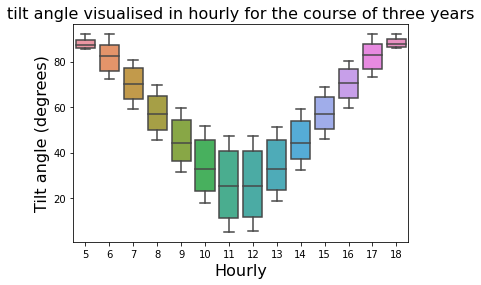

In [22]:
# Tilt angle visualised in hourly from 2017 - 2019
sns.boxplot(data['Hour'],y)
plt.ylabel('Tilt angle (degrees)',fontsize=16)
plt.xlabel('Hourly',fontsize=16)
plt.title('tilt angle visualised in hourly for the course of three years', fontsize=16)

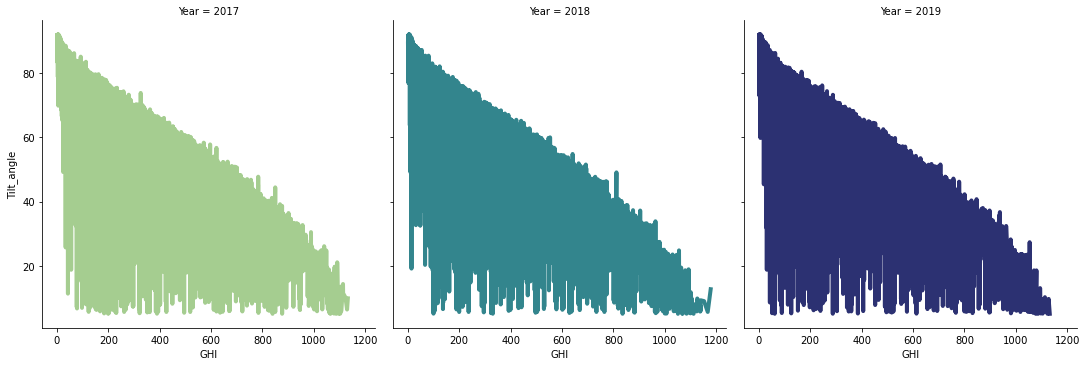

In [23]:
# Plot each year's hourly averaged Global solar irradience v Tilt angle
g = sns.relplot(
    data=data,
    x=GHI, y="Tilt_angle", col="Year", hue="Year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, legend=False)